In [1]:
import os
import pathlib
import cv2
import boto3
import matplotlib.pyplot as plt

## Read Data Connection Variables

In [2]:
AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")
AWS_S3_BUCKET = os.environ.get("AWS_S3_BUCKET")
AWS_S3_ENDPOINT = os.environ.get("AWS_S3_ENDPOINT")

## Define S3 Connection

In [3]:
session = boto3.Session(
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY
)
client = session.client("s3", endpoint_url=AWS_S3_ENDPOINT)

## Download and Extract the Dataset

In [4]:
if AWS_ACCESS_KEY_ID:
    # If S3 is not used in the demo, we can fallback
    # to the _scenario_resources directory.
    ! cp _scenario_resources/dataset.tar.gz dataset.tar.gz
else:
    client.download_file(AWS_S3_BUCKET, "dataset.tar.gz", "dataset.tar.gz")
    print("Files downloaded from S3")

! tar -xzf dataset.tar.gz

## Inspect the Data

In [5]:
!ls -l dataset/

total 8
drwxr-sr-x. 5 1000900000 1000900000 4096 Jul 18 08:57 images
drwxr-sr-x. 5 1000900000 1000900000 4096 Jul 18 08:57 labels


In [6]:
!ls -l dataset/images

total 12
drwxr-sr-x. 2 1000900000 1000900000 4096 Jul 18 08:57 test
drwxr-sr-x. 2 1000900000 1000900000 4096 Jul 18 10:25 train
drwxr-sr-x. 2 1000900000 1000900000 4096 Jul 18 10:25 val


### Number of Training Images

In [7]:
!ls -1 dataset/images/train | wc -l

64


### Number of Validation Images

In [8]:
!ls -1 dataset/images/val | wc -l

12


### Number of Test Images

In [9]:
!ls -1 dataset/images/test | wc -l

0


## Visualize the Data

['1718290471.692.jpg', '2.jpg', '1718287982.48.jpg', '1718290530.993.jpg', 'small_IMG_1520.jpg', '1718291037.183.jpg', '1718290468.092.jpg', '1718291042.185.jpg', 'small_IMG_1522.jpg']


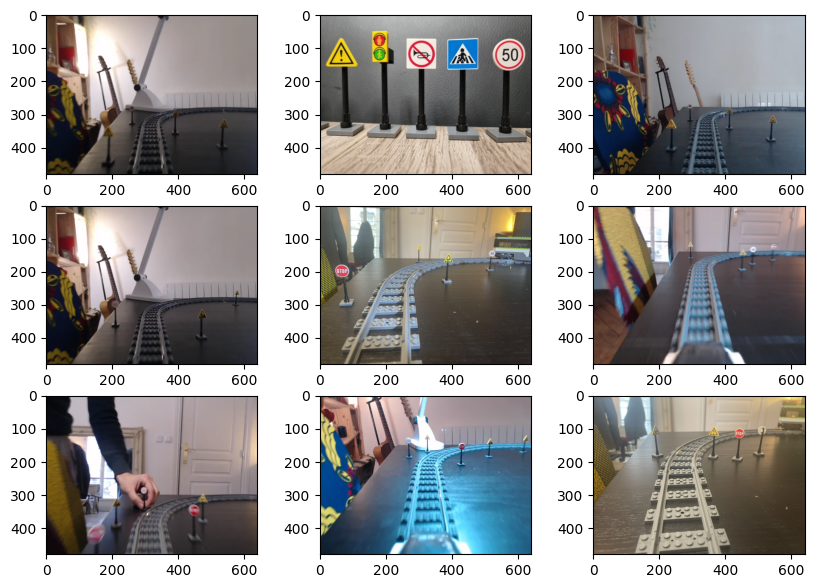

In [10]:
files = [f for f in os.listdir("dataset/images/train")][:9]
fig = plt.figure(figsize=(10, 7))
rows, columns = 3, 3
print(files)
for i, file in enumerate(files):
    fig.add_subplot(rows, columns, i+1)
    image = cv2.imread(pathlib.Path("dataset/images/train") / file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)

In [11]:
labels = [f.replace("images", "labeles").replace(".jpg", ".txt") for f in files][2:]
for l in labels:
    with open(pathlib.Path("dataset/labels/train") / l) as f:
        print(l)
        print(f.read())

1718287982.48.txt
0 0.457031 0.570833 0.020313 0.033333
1 0.367969 0.684375 0.054688 0.064583
1 0.647656 0.598958 0.032813 0.047917
1 0.846875 0.654167 0.046875 0.058333

1718290530.993.txt
0 0.323437 0.622917 0.040625 0.045833
1 0.738281 0.683333 0.042188 0.062500
1 0.900000 0.547917 0.021875 0.033333

small_IMG_1520.txt
1 0.604688 0.332292 0.043750 0.068750
1 0.468750 0.266667 0.025000 0.045833
0 0.810937 0.304167 0.034375 0.050000

1718291037.183.txt
0 0.460156 0.245833 0.032813 0.045833
0 0.706250 0.294792 0.031250 0.047917
1 0.756250 0.276042 0.031250 0.043750

1718290468.092.txt
0 0.458594 0.597917 0.035937 0.041667
1 0.332031 0.677083 0.032813 0.045833
1 0.736719 0.645833 0.042188 0.058333

1718291042.185.txt
1 0.417187 0.286458 0.034375 0.039583
1 0.504687 0.261458 0.028125 0.035417
1 0.802344 0.286458 0.029687 0.047917
1 0.971875 0.266667 0.028125 0.045833

small_IMG_1522.txt
1 0.295312 0.219792 0.050000 0.064583
1 0.568750 0.221875 0.056250 0.081250

